<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Equation-1:" data-toc-modified-id="Equation-1:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Equation 1:</a></span></li><li><span><a href="#Equation-2." data-toc-modified-id="Equation-2.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Equation 2.</a></span></li><li><span><a href="#Equation-3." data-toc-modified-id="Equation-3.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Equation 3.</a></span></li><li><span><a href="#Equation-4.-Calculate-Probability-of-an-event" data-toc-modified-id="Equation-4.-Calculate-Probability-of-an-event-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Equation 4. Calculate Probability of an event</a></span></li><li><span><a href="#Equation-5.-Log-Odds-of-an-event" data-toc-modified-id="Equation-5.-Log-Odds-of-an-event-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Equation 5. Log-Odds of an event</a></span></li><li><span><a href="#Equation-4." data-toc-modified-id="Equation-4.-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Equation 4.</a></span></li><li><span><a href="#Equation-5." data-toc-modified-id="Equation-5.-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Equation 5.</a></span></li></ul></div>

# Using Logistic Regression for Binary Classification: An Easy-To-Understand Guide

by Matthew Curcio

For individuals who have studied cell biology or biochemistry, logistic regression may be familiar as [dose-response curves](https://en.wikipedia.org/wiki/Dose%E2%80%93response_relationship) in clinical testing, the sigmoidal curve of [Oxgen binding to Haemoglobin](https://en.wikipedia.org/wiki/Hill_equation_(biochemistry)), [median lethal dose curve](https://en.wikipedia.org/wiki/Median_lethal_dose) drug safety or even an [exponential growth given limited resources](https://en.wikipedia.org/wiki/Logistic_function).

When Data Scientists discuss Logistic Regression (Logit) it is often used as a binary classifier. But, It can help you understand an outcome or make a prediction by providing three useful pieces of information.

1. Presence or Absence of a substance or quality
2. Probability of an event
3. Odds for or against an event

In plain English, a classifier is used to define or predict **Yes:No** answers, for example: 
- Success:Failure  
- Fraud:Safe  
- Benign:Malignant, *or even*
- Buy:Sell

But, Logit can help answer many more questions than **Yes:No**, 

- What is the probability customers will leave my business?   
- Is this transaction Fraudulent or Safe?   
- What is the probability that an event may occur?   
- What are the odds of being diagnosed with cancer if you smoke versus if you do not? 

<!--
It can even help Data Scientists determine which factors are important for keeping your customers and the probability of an event occurring.
-->

First, let’s take an example, A graphic showing the projected world population between 1950 and 2100:

![World Population between 1950-2100](assets/world-pop-1950-2100.cc.jpg)

When we look at the projected world population, we see each continent is added like a stacked bar chart but now over time. Further back in time, we approach zero population of humans. In the future, we will find a maximum value, an asymptote, that will be reached.

But let’s see if we can simplify this complicated s-shaped curve. 

If we only consider any two points on our curve, we could use a linear set of equations.
This would make sense since each continent has its own growth rate per time ($\beta_{continent}$) and starting population ($x_{continent}$) at $t=0$ plus a constant ($\beta_0$).

### Equation 1: 

Population $(t=0 → t) = \beta_{Asia} \cdot x_{Asia} ~+~ \beta_{Africa} \cdot x_{Africa} ~+~ ... ~+~ \beta_{Oceania} \cdot x_{Oceania} ~+~ \beta_0$

If we look at EQ1 and figure 1, we see multiplication in matrix format. A (1 row by 6 column) matrix times a (1 column by 6 row) matrix + b = Y, our population at time = t.

We can rewrite this in matrix format:

$$World ~ Population ~=~ 
\left( \begin{array}{c} Growth~Rate \\ \overline{\beta_{Oceania}} \\ \beta_{S.America} \\ \beta_{N.America} \\ \beta_{Europe} \\ \beta_{Africa} \\ \beta_{Asia}  \end{array} \right)
\left( \begin{array}{c} Population \\ \overline{x_{Oceania}} \\ x_{S.America} \\ x_{N.America} \\ x_{Europe} \\ x_{Africa} \\ x_{Asia}  \end{array} \right)
+  \beta_0$$

### Equation 2. 

$$Population(t=0 ~ → ~ t) = MX + b$$

>NOTE: By convention capital letters represent matrices.

How you may ask, can we have a linear regression fit a curved s-shaped line? 

- Using logs and exponents, we can transform the regression line.

### Equation 3. 

ln(e^-(MX + b)) = MX + b

### Now let’s consider a logistic curve.

![A Simple Logistic Regression](assets/ps_pf_one.png)

In [1]:
fig.align = "center", fig.height = 3.5}
x < - seq(-6, 6, 0.05)
y < - 1 / (1 + exp(-x))

plot(x, y,
type = "l",
main = "Logistic Curve",
ylim = c(-0.3, 1.3))
abline(h = 0, col = "blue")
abline(v = 0, col = "red", lty = 3, lwd = 3)
abline(h = 1, col = "blue", lty = 3)
text(-3.5, 0.48, cex = 1.75, "if x < 0 then y = 0")
text(3.5, 0.48, cex = 1.75, "if x >= 0 then y = 1")


SyntaxError: unmatched '}' (3113513785.py, line 1)

1. Our x-axis can be time or any other independent value. 
2. The y-axis, we see Probability, from 0 to 1. 

Remember, Probabilities are only between zero chance to 100% certainty. 

On our simple graph, where x=0, we see an inflection point at 50% Probability. At that point, the probability of success (p) is 1/2, and the probability of failure (1-p) is also 1/2. Can we use this fact as our next transformation?

### Equation 4. Calculate Probability of an event

ln( Probability ) = MX + b

### Equation 5. Log-Odds of an event

ln(p / (1-p)) = MX + b

In other words, if the Probability = 0.5 then we find the odds of our event occurring at x=0 is [(0.5) : (0.5)]. 

If we were flipping a coin that it would be 1:1 odds. The ln(p / (1-p)) in equation 4 is commonly called log-odds. But if we wanted just odds, we would transform using the exponent.

### Equation 4. 

e^[ ln(p / (1-p))] = e^[MX + b]

p / (1-p) = e^[MX + b]

Next, We can expand our matrix multiplication to get Equation 5. 

### Equation 5. 

p / (1-p) = e^[ βAsia.XAsia + βAfrica.XAfrica +...+ βOceania.XOceania + β0 ]

AttributeError: 'Line2D' object has no property 'ymax'

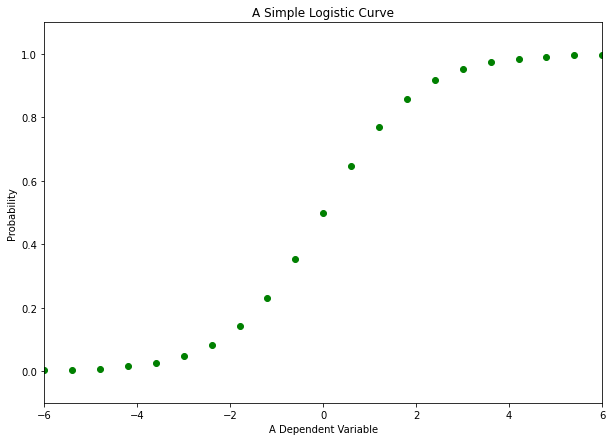

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import math
#%matplotlib notebook
%matplotlib inline

x = np.linspace(-6,6,21)
y = 1/(1+np.exp(-1*x))
y2=1

plt.figure(figsize=(10,7)) # 10 is width, 7 is height
plt.plot(x, y, 'go')  # go=green dots
plt.title('A Simple Logistic Curve')  
plt.xlabel('A Dependent Variable')
plt.ylabel('Probability')
plt.xlim(-6,6)
plt.ylim(-0.1,1.1)

#plt.plot(x, y2=1, color='g')  # go=green dots

plt.axhline(y=0.5, color='r', linestyle='-')
plt.axhline(y=0, color='b', linestyle='-')
plt.axhline(y=1, color='b', linestyle='-')

plt.axvline(x = 0, color = 'g')

plt.show()

# https://liujing.neocities.org/newworld/datascience/Python/plotting/1.%20Basic%20Plotting%20with%20matplotlib

https://www.kaggle.com/code/neisha/heart-disease-prediction-using-logistic-regression

In [ ]:
# Create new dataframe with selected features

df = df[['SysBP','Glucose','Age','TotChol','CigsPerDay','DiaBP','PrevalenHyp','Diabetes','BPMeds','Fale','TenYearD']]